<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/Assigment_1_Session_4_s8091335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

For tasks in Session 4, Pandas, Seaborn, and Matplotlib libraries are good to go with.
The code above imports and uses the get_python function to reset the current environment. It is optional.

This notebook does not have the "print(data.head())". Just open the variable inspector window in Spyder, Anaconda notebook, Google Colab notebook.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Import:

* Pandas for dataframe manipulation.

* Seaborn in collaboration with Matplotlib for more attractive visualization.

* Nltk with "Vader lexicon" dictionary and "SentimentIntensityAnalyzer" class for sentiment analysis.

First, assign the SentimentIntensityAnalyzer class to "sentiment" variable.

In [7]:
df = pd.read_excel('Food_dataset.xlsx')

Import the CSV dataset and print out first 5 rows for checking (just to ensure).

In [8]:
df['other feedback'] = df['other feedback'].astype(str)

Because the assignment requires to analyze the particulate feedback, so the "other feedback" will be the main target for sentiment analysis. This is also the reason for using "SentimentIntensityAnalyzer" class in the NLTK library. It's simple and convenient to use in this case.

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stop words are word that do not bring significant values to the sentiment analysis process.

First, download the corpus of stop words (a list of stop words) in NLTK library. Then, creates a SnowballStemmer object for the English language. It is good to reduce insignificant words in a string (or a feedback). Next, the third line will import the "stopwords" module from NLTK library. It functions with the stop words corpus. Next, import the "string" library to ensure all string handling functions work smoothly. Last, creates a set of stopwords from the English stopwords corpus and assign that set structure to the "stopword" variable.

(A lot of stop-word names. Don't be confused.)

In [15]:
def clean(text):
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

Buil a function to clean the text (string). First, lowercase all letters within the string. Next, remove all stop words, including:

* square brackets and their contents
* URLs
* HTML tags
* punctuation
* newline characters
* words that contain numbers

In this case, we just need the stop words list.

In [16]:
df["other feedback"] = df["other feedback"].apply(clean)

Apply the "clean" function above to all rows in the "other feedback" column.

In [18]:
df["other feedback score"] = [sentiment.polarity_scores(i)['compound'] for i in df['other feedback']]

Create a new column to store the sentiment score after analyzing the text in "other feedback" column. "sentiment.polarity_scores" calls and applies the polarity_score function, which take "i" (text) to analyze and return the result. Here, it takes the compound score (argument 'compounr') only. The list comprehension "for i in df['other feedback']" is a good practice to go with.

In [21]:
df_mean_groups = df.groupby('suplier location ')['other feedback score'].mean()

To answer the question "identify state which has more positive feedback", it is necessary to check the mean value of each group of locations.

Create a new dataframe "df_mean_groups" to avoid any error. Use the groupby() function to group all the "other feedback value" by groups of values in the "supplier location ' column. Then, apply the mean() function to calculate the mean value of each group.

In [26]:
most_positive_state = df_mean_groups.sort_values(ascending=False).index[0]
print(most_positive_state)

VIC


Use the sort_values() function to sort the mean value by groups. The argument "ascending=False" makes the highest mean value at the top row. The index() method takes the first row, which is the location with the most positive feedback (the highest mean value).

Alright, just print the result out. **VIC.**

However, there is still the "product feedback" column, which contains the string (most likely the 5-level Likert scale). It is better to be careful now than to be sorry later. That column is analyzed also for comparison of the outcome.

In [30]:
df['product_feedback_score']=''

Create a new colum "product_feecback_score" to store the score of the feedback.

In [47]:
df.loc[df['product feedback'] == 'Extremely Poor', 'product_feedback_score'] = -1
df.loc[df['product feedback'] == 'strongly diagree', 'product_feedback_score'] = -1
df.loc[df['product feedback'] == 'disagree', 'product_feedback_score'] = -1
df.loc[df['product feedback'] == 'agree', 'product_feedback_score'] = 1
df.loc[df['product feedback'] == 'strongly agree', 'product_feedback_score'] = 1

Because on that "product feedback" there is only the "negative" feedback (Extremely Poor, stronly disagree, disagree) and "positive" feedback (agree, stronly agree), the loc() function is applied to assign "-1" value for negative feedback (or all types of disagree) and "1" value for positive feedback (all types of agree).

In [48]:
df_mean_groups_alt = df.groupby('suplier location ')['product_feedback_score'].mean()

The same convention as above, the locations are group together and means of their feedback score are calculated.

In [49]:
most_positive_state_alt = df_mean_groups_alt.sort_values(ascending=False).index[0]
print(most_positive_state_alt)

VIC


The same convention as above, the mean values are sort descendingly and the first value (first row) is taken and printed out.

In [50]:
correlation = df['product_feedback_score'].corr(df['other feedback score'], method='spearman')

print("Spearman rank correlation coefficient:", correlation)

Spearman rank correlation coefficient: -0.018321835989154475


For convenience yet carefulness in general correlation coefficient, the Spearman's rank correlation coefficient is applied to calculate the correlation coefficient between two columns "product_feedback_score" (transformed from the Likert-scale) and "other feedback score" (calculated by SentimentIntensityAnalyzer class of NLTK library). The Spearman coefficient is -0.018, implying that these columns, as variables, are not stastistically related to each other.



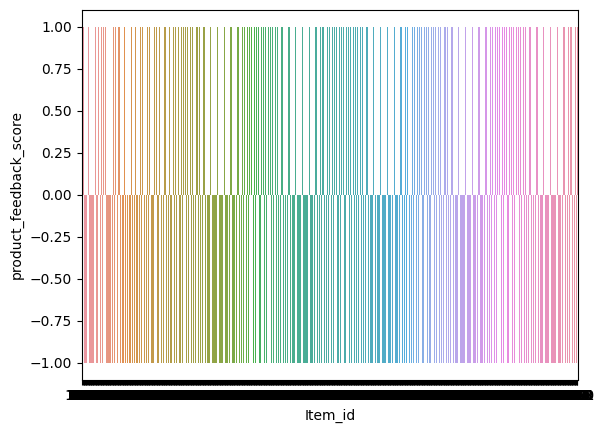

In [55]:
sns.barplot(x=df['Item_id'], y=df['product_feedback_score'], data=df)
plt.show()

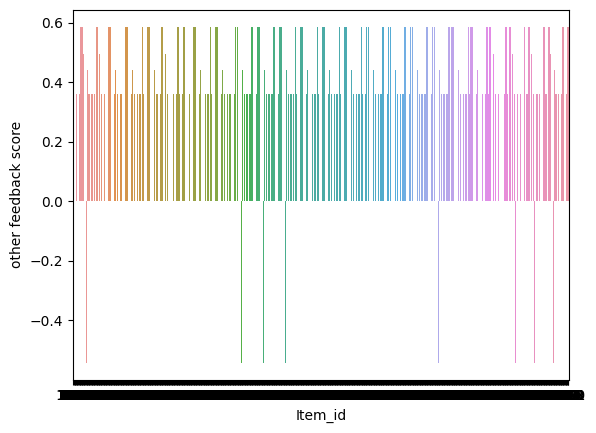

In [56]:
sns.barplot(x=df['Item_id'], y=df['other feedback score'], data=df)
plt.show()

The bar charts above visualize the distribution of scores. Regardless to the "might-not-inaccurate" scoring from analyzing steps above, the Spearman coefficient score near zero means that those two ways of scoring and especially the two feedback columns are not significantly relevant to each other. It's worth discussing further for business strategy.

In [64]:
mean_price_by_locations = df.groupby('suplier location ')['sold price '].mean().reset_index()

To answer the question "Does product price varies city to city?", it is necessary to check the mean value of each group of locations.

Create a new dataframe "mean_price_by_locations" to avoid any error. Use the groupby() function to group all the "sold price" by groups of values in the "supplier location ' column. The reason of using the sold price instead of purchase price is based on the assumption that all suppliers strictly comply with ACCC, meaning that the supplier price cannot vary from buyer to buyer. Only the purchase price may be affected by different conditions in each states. Then, apply the mean() function to calculate the mean value of each group.

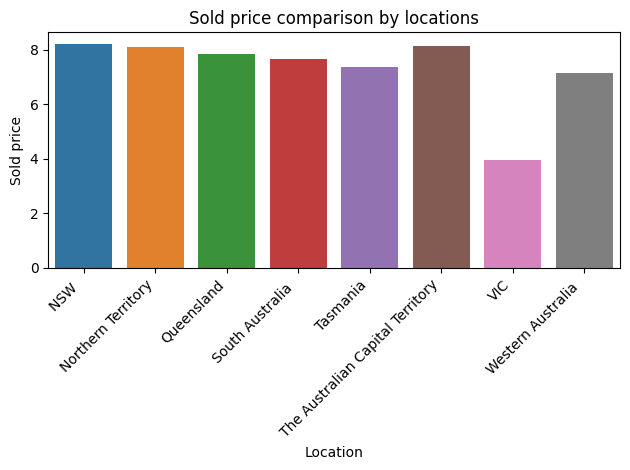

In [73]:
sns.barplot(x=mean_price_by_locations['suplier location '], y=mean_price_by_locations['sold price '], data=mean_price_by_locations)
plt.xlabel('Location')
plt.ylabel('Sold price')
plt.title('Sold price comparison by locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show the chart
plt.show()